<a href="https://colab.research.google.com/github/Jastej786/quantitative_analysis_of_prices/blob/main/quantitative_analysis_of_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quantitative analysis of prices and daily returns

In [ ]:
!pip install yfinance

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
from matplotlib import rcParams
rcParams['figure.figsize']=8,6
import seaborn as sb
sb.set(style='white')
import yfinance as yf


*   pandas_datareader is used to get data from online source
*   rcParams is used to customise the plots made by matplotlib
*   
seaborn is library which make more attractive graphs and visuals





#2) Download and store data

In [ ]:
nyka = yf.download('NYKAA.NS',start='2015-01-01')

[*********************100%%**********************]  1 of 1 completed


#3) take a look at data

In [ ]:
nyka.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-10,336.333344,374.666656,333.333344,367.633331,367.633331,205947786
2021-11-11,368.950012,373.450012,340.625000,368.924988,368.924988,43138662
2021-11-12,374.666656,401.658325,363.350006,393.049988,393.049988,34978218
2021-11-15,376.833344,388.733337,364.166656,380.375000,380.375000,20735118
2021-11-16,378.000000,385.000000,371.333344,372.791656,372.791656,9042750


#4) Now we store the closing data of nykaa stock in new dataframe

In [ ]:
nyka_close = nyka['Close']
nyka_return = np.log(nyka_close).diff()

In [ ]:
nyka_return.head()

Date
2021-11-10         NaN
2021-11-11    0.003507
2021-11-12    0.063343
2021-11-15   -0.032779
2021-11-16   -0.020138
Name: Close, dtype: float64

list=[0,1,2]

np.log(list) gives an array. lets name it lulu

then lulu[i]=log(list[i])

then lulu.diff() take difference of consecutive numbers and make a list ulu

ulu[i]=lulu[i+1]-lulu[i]

#5) We now plot the data

<Axes: xlabel='Date'>

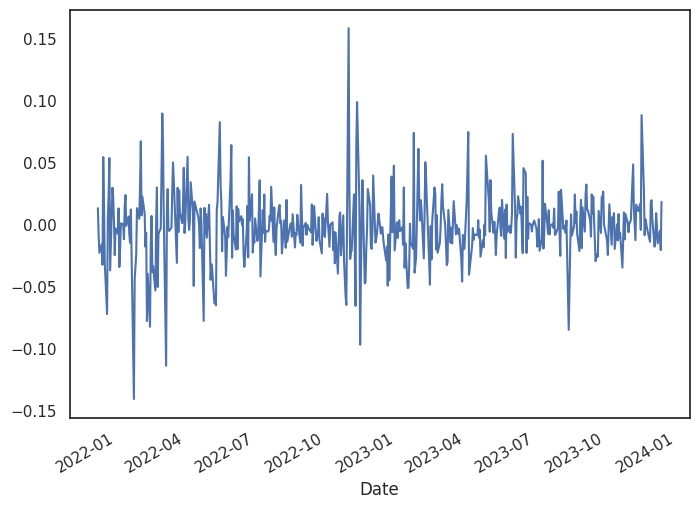

In [ ]:
nyka_return[-500:].plot()
# nyka_return[-60:].plot()
# returns latest 60 data point, we can choose how many years of data we need

#6) We can get some basics statistics of np array

In [ ]:
nyka_close.describe()
nyka_return.describe()

count    518.000000
mean      -0.001495
std        0.028139
min       -0.140742
25%       -0.015066
50%       -0.002177
75%        0.012184
max        0.158737
Name: Close, dtype: float64

#7) Other way of findinf statistics is using scipy stats

In [ ]:
from scipy import stats
stats.describe(nyka_return)

DescribeResult(nobs=519, minmax=(nan, nan), mean=nan, variance=nan, skewness=nan, kurtosis=nan)

All of this return nan (not a number) because of the first value, so we can change that by changing all the nan values to true

In [ ]:
nyka_return.dropna(inplace=True)
nyka_return.head()

Date
2021-11-11    0.003507
2021-11-12    0.063343
2021-11-15   -0.032779
2021-11-16   -0.020138
2021-11-17   -0.052170
Name: Close, dtype: float64

In [ ]:
stats.describe(nyka_return)

DescribeResult(nobs=518, minmax=(-0.14074192628138338, 0.1587371770922834), mean=-0.0014952281449163206, variance=0.0007918295266599975, skewness=0.1750858416712434, kurtosis=4.2810899966755365)

the kurtosis here which is shown is fischer kurtosis. It subtracts 3 from raw kurtosis. i.e raw kurtosis will be 7.26 here. or we just say that it was 4.26 excess kurtosis


In [ ]:
#To round up the data of nyka_return. we multiply it by 100 and round to 2 digits
nyka_return=np.round(nyka_return*100,2)

In [ ]:
nyka_return.head()

Date
2021-11-11    0.35
2021-11-12    6.33
2021-11-15   -3.28
2021-11-16   -2.01
2021-11-17   -5.22
Name: Close, dtype: float64

In [ ]:
n,minmax,mean,var,skew,kur=stats.describe(nyka_return)
std=var ** 0.5
mini, maxi = minmax
#stored statstic values in variables

Now we can compare this data of returns to normal distribution

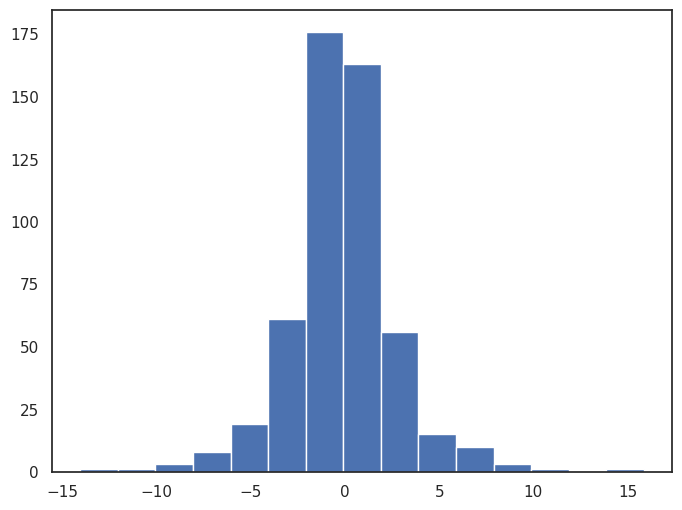

In [ ]:
plt.hist(nyka_return,bins=15);

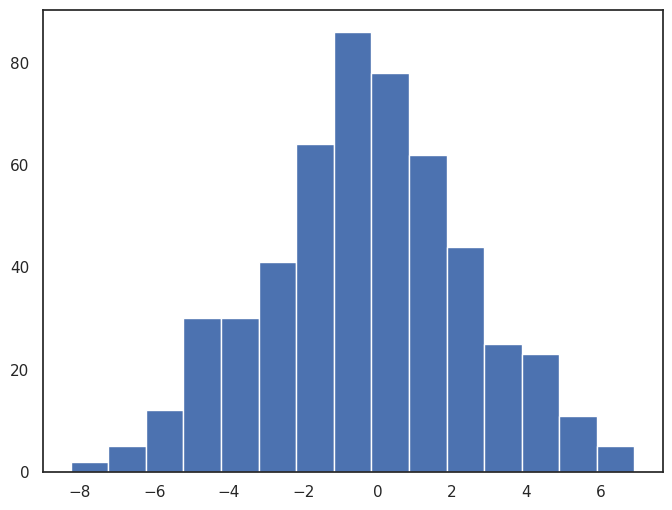

In [ ]:
from scipy.stats import norm
x=norm.rvs(mean,std,n)
plt.hist(x,bins=15);

#Can we compare our distribution to normal distribution?
To check this we do kurtosis test

In [ ]:
x_test = stats.kurtosistest(x)
nyka_test = stats.kurtosistest(nyka_return)
print(f'{"       Test Statistic":20}{"p-value":>15}')
print(f'{" "*5}{"-"*30}')
print(f"x:{x_test[0]:>17.2f}{x_test[1]:>16.4f}")
print(f"NYKA:{nyka_test[0]:>14.2f}{nyka_test[1]:>16.4f}")

       Test Statistic        p-value
     ------------------------------
x:            -0.66          0.5104
NYKA:          7.56          0.0000


we reject a p-value if it is very small or less than alpha(usually 5%). here we have p-value 51.04%, thus we cannot reject null hypothesis. Null hypothesis is that the obtained distribution is a normal distribution. for our nyka stock. p-value is very near to 0, so we have to reject the null hypothesis and it cannot be considered as normal.

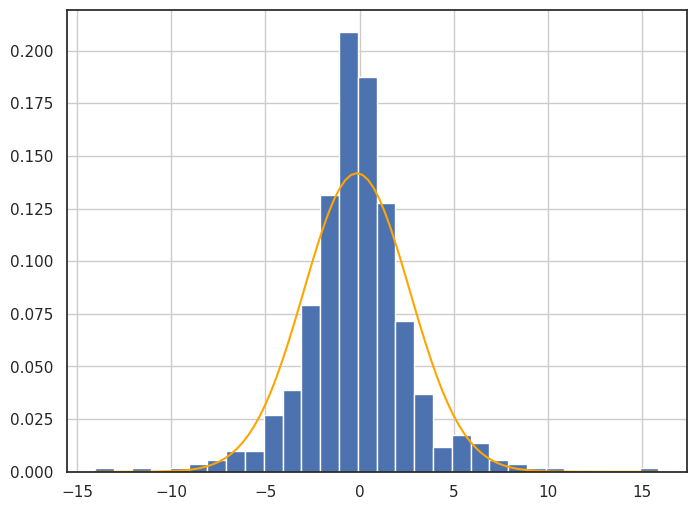

In [ ]:
plt.hist(nyka_return, bins=30, edgecolor='w',density = True )
plt.grid()
overlay = np.linspace(mini,maxi,100)
plt.plot(overlay,norm.pdf(overlay,mean,std),color='orange')
#plt.fill_between(overlay,norm.pdf(overlay,mean,std),color='red')

#Is Daily price change significantly different from zero?
* Conduct Simple hypothesis

In [ ]:
stats.ttest_1samp(nyka_return,0,alternative = 'two-sided')
#t-test

TtestResult(statistic=-1.210097559516892, pvalue=0.2267944367072233, df=517)

#Can price movement be described as a random walk?


* Create Price lags

In [ ]:
nyka_close.head()

Date
2021-11-10    367.633331
2021-11-11    368.924988
2021-11-12    393.049988
2021-11-15    380.375000
2021-11-16    372.791656
Name: Close, dtype: float64

we convert this to a data frame and then add 2 lag columns

In [ ]:
nyka_close = pd.DataFrame(nyka_close , columns=['Close'])
nyka_close['lag_1']=nyka_close.Close.shift(1)
nyka_close['lag_2']=nyka_close.Close.shift(2)
nyka_close.dropna(inplace=True)
nyka_close.head()

,Close,lag_1,lag_2
Date,,,
2021-11-12,393.049988,368.924988,367.633331
2021-11-15,380.375000,393.049988,368.924988
2021-11-16,372.791656,380.375000,393.049988
2021-11-17,353.841675,372.791656,380.375000
2021-11-18,354.208344,353.841675,372.791656


we should be able to predict close on a day with data on 2 days before if it is random walk, thus we make a regression model

In [ ]:
lr = np.linalg.lstsq(nyka_close[['lag_1',"lag_2"]],nyka_close['Close'],rcond = None)[0]
print(lr)

[ 1.19456256 -0.19691614]


In [ ]:
nyka_close['predict']=np.dot(nyka_close[['lag_1','lag_2']],lr)
nyka_close.head()

,Close,lag_1,lag_2,predict
Date,,,,
2021-11-12,393.049988,368.924988,367.633331,368.311039
2021-11-15,380.375000,393.049988,368.924988,396.875512
2021-11-16,372.791656,380.375000,393.049988,376.983845
2021-11-17,353.841675,372.791656,380.375000,370.420976
2021-11-18,354.208344,353.841675,372.791656,349.277320


<Axes: xlabel='Date'>

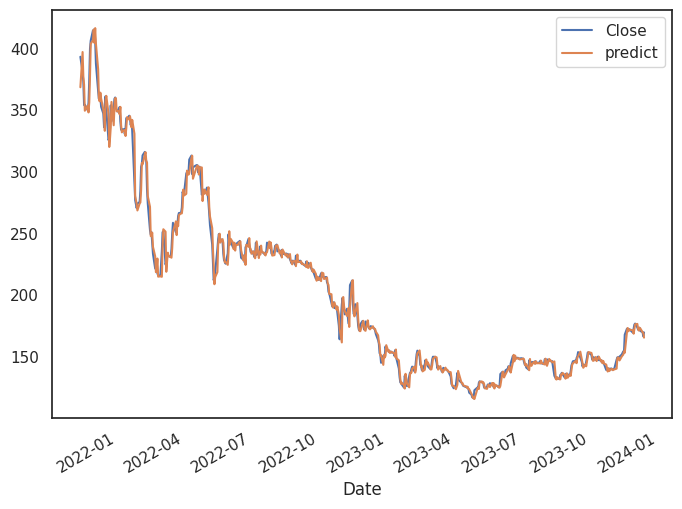

In [ ]:
nyka_close[['Close','predict']].plot()

<Axes: xlabel='Date'>

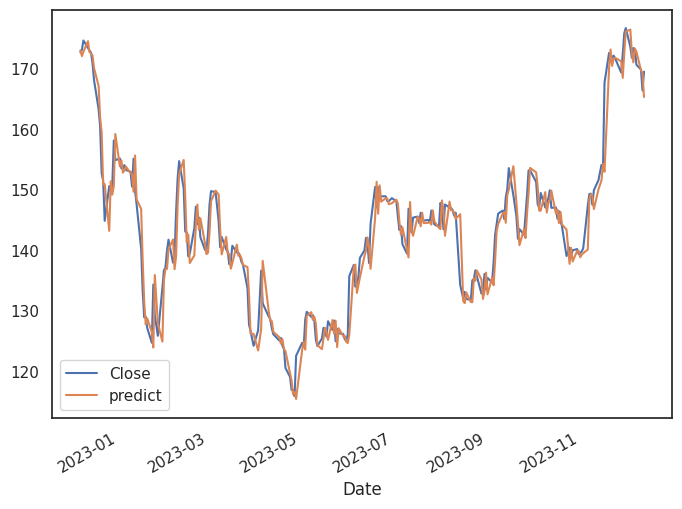

In [ ]:
nyka_close.iloc[-252:][['Close','predict']].plot()